# Import modules

In [1]:
from __future__ import division

import os; os.chdir(os.path.join('..', '..'))
print os.getcwd()

/Users/eharkin/Documents/School/Grad work/5HTGIF


In [2]:
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np

from src.Simulation import GIFnet_Simulation
from src.Tools import PSTH

# Load data

In [3]:
DATA_PATH = os.path.join('data', 'simulations', 'GIF_network')
simfiles = {}
for fname in os.listdir(DATA_PATH):
    if fname[-4:].lower() == 'hdf5' and 'test' not in fname:
        try:
            simfiles[fname[:-5]] = GIFnet_Simulation(os.path.join(DATA_PATH, fname), mode = 'r')
        except IOError:
            warnings.warn('Problem with file {}. Continuing.'.format(fname), RuntimeWarning)
    else:
        continue

In [4]:
simfiles.keys()

['subsample_base_m_g',
 'subsample_base_l_ng',
 'subsample_base_h_ng',
 'subsample_noIA_l_ng',
 'subsample_fixedIA_l_ng',
 'subsample_base_l_g',
 'subsample_fixedIA_l_g',
 'subsample_base_h_g',
 'subsample_fixedIA_m_g',
 'subsample_noIA_h_g',
 'subsample_noIA_m_g',
 'subsample_fixedIA_h_g',
 'subsample_fixedIA_m_ng',
 'subsample_base_m_ng',
 'subsample_noIA_h_ng',
 'subsample_noIA_l_g',
 'subsample_fixedIA_h_ng',
 'subsample_noIA_m_ng']

# Analysis
## Extract PSTH

In [5]:
PSTH_width = 25.

ser_PSTHs = {}
gaba_PSTHs = {}
for cond in simfiles.keys():
    
    ser_PSTHs[cond] = np.empty((simfiles[cond].get_no_sweeps(), simfiles[cond].get_no_timesteps()))
    if cond[-2:].lower() == '_g':
        gaba_PSTHs[cond] = np.empty((simfiles[cond].get_no_sweeps(), simfiles[cond].get_no_timesteps()))
    
    for sweep_no in range(simfiles[cond].get_no_sweeps()):
        ser_PSTHs[cond][sweep_no, :] = PSTH(
            simfiles[cond].ser_spktrains[sweep_no, ...].sum(axis = 0),
            PSTH_width,
            simfiles[cond].get_no_ser_neurons()
        )
        if cond[-2:].lower() == '_g':
            gaba_PSTHs[cond][sweep_no, :] = PSTH(
                simfiles[cond].gaba_spktrains[sweep_no, ...].sum(axis = 0),
                PSTH_width,
                simfiles[cond].get_no_gaba_neurons()
            )

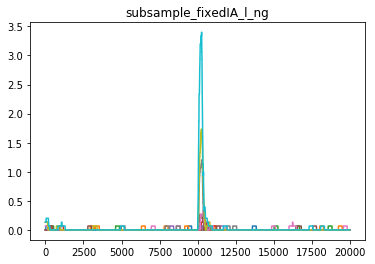

In [6]:
plt.subplot(111)
plt.title(ser_PSTHs.keys()[0])
plt.plot(ser_PSTHs[ser_PSTHs.keys()[0]].T)
plt.show()

## Plot I/O curves

In [7]:
def condname(prefix, model, baseline, gaba):
    """Throwaway function to build keys in a consistent way.
    """
    return '_'.join([prefix, model, baseline, gaba])

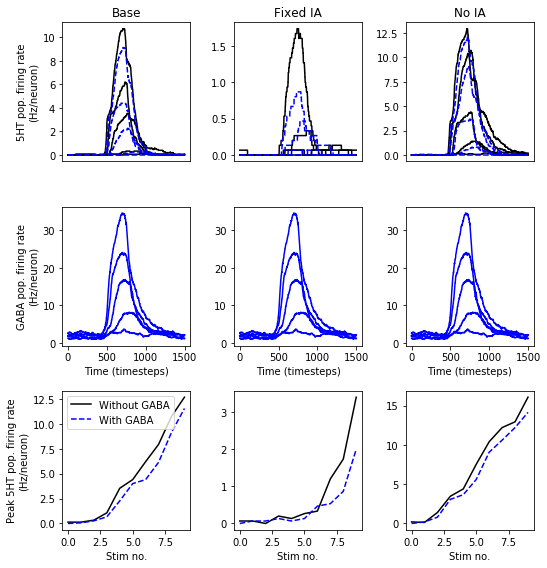

In [8]:
time_slice = slice(9500, 11000)

plt.figure(figsize = (10, 8))

spec_outer = gs.GridSpec(3, 4)

# Column 1: base model
plt.subplot(spec_outer[0, 0])
plt.title('Base')
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'ng')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'g')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])
plt.ylabel('5HT pop. firing rate\n(Hz/neuron)')

plt.subplot(spec_outer[1, 0])
plt.plot(
    gaba_PSTHs[condname('subsample', 'base', 'l', 'g')][::2, time_slice].T,
    'b-'
)
plt.ylabel('GABA pop. firing rate\n(Hz/neuron)')
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 0])
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'ng')][:, time_slice].max(axis = 1),
    'k-', label = 'Without GABA'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'g')][:, time_slice].max(axis = 1),
    'b--', label = 'With GABA'
)
plt.ylabel('Peak 5HT pop. firing rate\n(Hz/neuron)')
plt.xlabel('Stim no.')
plt.legend()

# Column 2: model with fixed IA max cond. and kinetics
plt.subplot(spec_outer[0, 1])
plt.title('Fixed IA')
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'g')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])

plt.subplot(spec_outer[1, 1])
plt.plot(
    gaba_PSTHs[condname('subsample', 'fixedIA', 'l', 'g')][::2, time_slice].T,
    'b-'
)
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 1])
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng')][:, time_slice].max(axis = 1),
    'k-'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'g')][:, time_slice].max(axis = 1),
    'b--'
)
plt.xlabel('Stim no.')

# Column 3: Model with no IA
plt.subplot(spec_outer[0, 2])
plt.title('No IA')
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng')][::2, time_slice].T, 
    color = 'k'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'g')][::2, time_slice].T, 
    'b--'
)
plt.xticks([])

plt.subplot(spec_outer[1, 2])
plt.plot(
    gaba_PSTHs[condname('subsample', 'noIA', 'l', 'g')][::2, time_slice].T,
    'b-'
)
plt.xlabel('Time (timesteps)')

plt.subplot(spec_outer[2, 2])
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng')][:, time_slice].max(axis = 1),
    'k-'
)
plt.plot(
    ser_PSTHs[condname('subsample', 'noIA', 'l', 'g')][:, time_slice].max(axis = 1),
    'b--'
)
plt.xlabel('Stim no.')

plt.tight_layout()
plt.show()

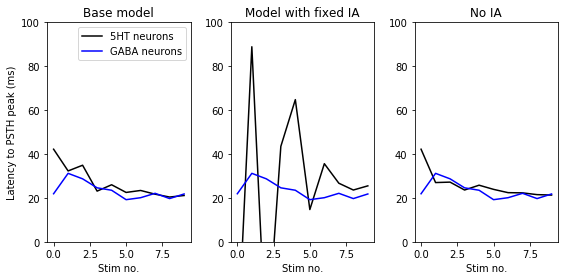

In [9]:
plt.figure(figsize = (8, 4))

ax1 = plt.subplot(131)
plt.title('Base model')
plt.plot(
    ser_PSTHs[condname('subsample', 'base', 'l', 'ng')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 
    'k-', label = '5HT neurons'
)
plt.plot(
    gaba_PSTHs[condname('subsample', 'base', 'l', 'g')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 
    'b-', label = 'GABA neurons'
)
plt.legend()
plt.ylabel('Latency to PSTH peak (ms)')
plt.xlabel('Stim no.')

plt.subplot(132, sharey = ax1)
plt.title('Model with fixed IA')
plt.plot(ser_PSTHs[condname('subsample', 'fixedIA', 'l', 'ng')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'k-')
plt.plot(gaba_PSTHs[condname('subsample', 'fixedIA', 'l', 'g')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'b-')
plt.xlabel('Stim no.')

plt.subplot(133, sharey = ax1)
plt.title('No IA')
plt.plot(ser_PSTHs[condname('subsample', 'noIA', 'l', 'ng')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'k-')
plt.plot(gaba_PSTHs[condname('subsample', 'noIA', 'l', 'g')][:, time_slice].argmax(axis = 1) * 0.1 - 50., 'b-')
plt.ylim(0., 100.)
plt.xlabel('Stim no.')

plt.tight_layout()
plt.show()

# Close all files

In [10]:
for fname in simfiles.keys():
    simfiles[fname].close()